In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
C = 10.
margin = 0.1
data = pd.read_csv(f'experiments/M_{margin}_data.csv')
data = data[(data['R'] < 400000) & (data['M'] < 20) & (data['M'] > 4) & (data['C'] == C)]
#data = data[(data['R'] < 400000)]

In [54]:
data['R']

1980       10.0
1981       11.0
1982       12.0
1983       13.0
1984       14.0
         ...   
8905     7564.0
8906     8111.0
8907     8697.0
8908     9326.0
8909    10000.0
Name: R, Length: 6930, dtype: float64

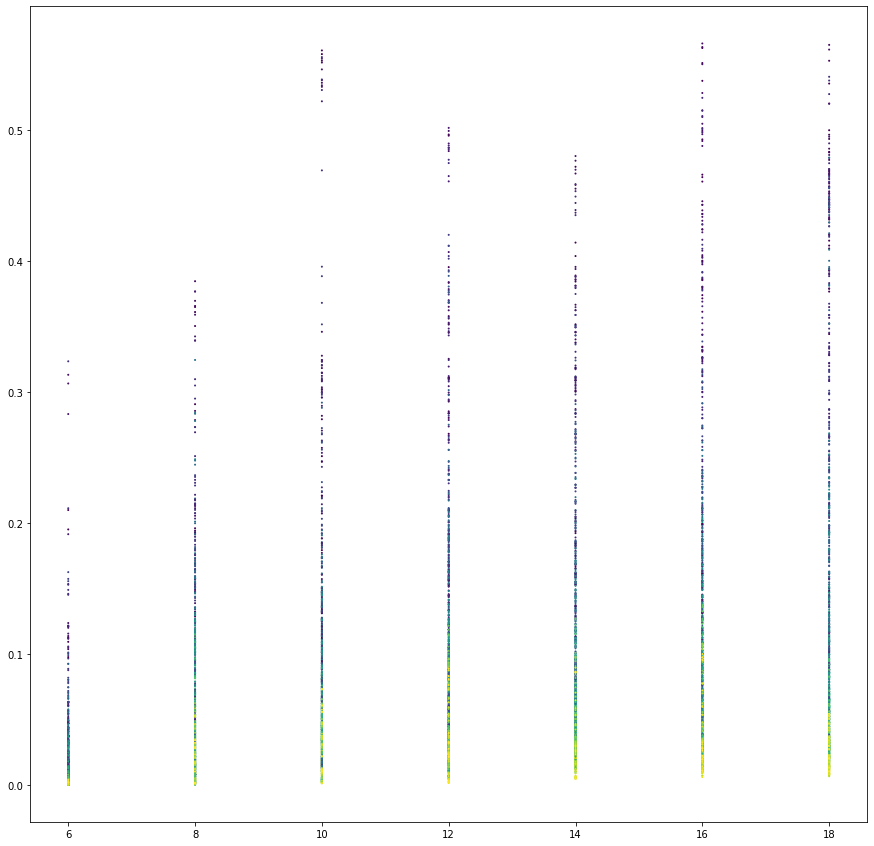

In [47]:
Ms = list(set(data['M']))
Ms.sort()
Ms = np.array(Ms)
shots = list(set(data['R']))
compressed_data = pd.DataFrame(columns=['M','R','mean','std','max','min','n'])
for M in Ms:
    for R in shots:
        mean = np.mean(data[(data['M'] == M) & (data['R'] == R)]['epsilon_euclid1'])
        std = np.std(data[(data['M'] == M) & (data['R'] == R)]['epsilon_euclid1'])
        max = np.max(data[(data['M'] == M) & (data['R'] == R)]['epsilon_euclid1'])
        min = np.min(data[(data['M'] == M) & (data['R'] == R)]['epsilon_euclid1'])
        n = len(data[(data['M'] == M) & (data['R'] == R)]['epsilon_euclid1'])
        compressed_data.loc[compressed_data.shape[0]] = [M,R,mean,std,max,min,n]
plt.figure(figsize=(15,15))
colors = np.log(data['R'])
plt.scatter(data['M'],data['epsilon_euclid1'],s=1,c=colors,cmap='viridis')

In [40]:
epsilons, h = np.linspace(0,0.5,100,retstep=True)
R_needed = np.zeros((len(epsilons),len(Ms)))
for j, e in enumerate(epsilons):
    for i, M in enumerate(Ms):
        data_M = compressed_data[compressed_data['M'] ==  M]
        filter = np.abs(np.array(data_M['mean'])) < e
        R_needed[j,i] = np.min(data_M['R'][filter])

** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
0.48470026921178133
0.7920352038516182
0.041064463959112674
0.015202994673203627
0.019242461837830602
0.020137801660305703
0.010051188928930069
0.023106365153672336
0.024290157305030275
0.031982107556678546
0.03318448691956695
0.025523875206764628
0.03942779015110939
0.047209007784566305
0.04147456543435973
0.047926000031437745
0.05179716421168214
0.05528442066097363
0.06094790055055047
0.03391168509106369
0.039027573318786285
0.0770510211408559
0.08071595381803068
0.07773441939642943
0.0694841878188182
0.08025467317205241
0.20645562562892755
0.21651251772866129
0.2549265535250718
0.3550452250439981
0.3550452250439981
0.4029767314883716
0.4885455377597299
0.46891203670919

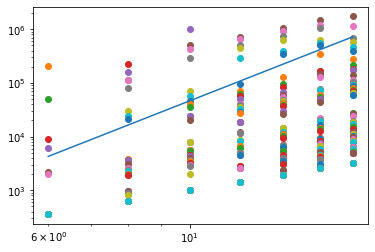

In [48]:
exponents = []
new_eps = []
for j, e in enumerate(epsilons):
    try:
        plt.scatter(Ms,Ms**2*R_needed[j,:],label=e)
        plt.xscale('log')
        plt.yscale('log')
        p = np.polyfit(np.log(Ms),np.log(Ms**2*R_needed[j,:]),1)
        print(np.exp(p[1]))
        exponents.append(p[0])
        new_eps.append(e)
    except:
        continue
plt.plot(Ms,Ms**(14/3))

Text(0, 0.5, 'Exponent')

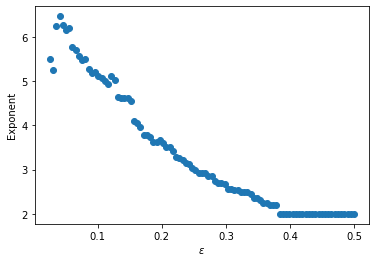

In [49]:
plt.scatter(new_eps,exponents)
plt.xlabel(r'$\varepsilon$')
plt.ylabel('Exponent')


In [50]:
np.mean(exponents)

3.3805237952983482

In [155]:
def get_R(a,b,c,d,eps,M):
    return c*(M**a/eps**b) + d

fun = lambda x: get_R(x[0],x[1],x[2],x[3],data['epsilon'],data['M']) - data['R']

In [202]:
x0 = [4,2,1,0]
np.linalg.norm(fun(x0))

77144750162.39392

In [203]:
from scipy.optimize import leastsq
x = leastsq(fun,x0)[0]
print(x)
print(np.linalg.norm(fun(x)))

[5.34606914e+00 1.18129859e+00 6.50895871e-05 1.10720901e+03]
577805.8637300961
